# Read data

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import optuna

In [78]:
data_train = np.load('X_train.npy')
data_test = np.load('X_test.npy')

data_y_train = pd.read_csv('y_train.csv')
#y_test = pd.read_csv('y_test.csv')
data_y_test = pd.read_csv('sample_submission.csv')

print(data_train.shape, data_y_train.shape)
print(data_test.shape)

(323, 40, 100) (32300, 2)
(54, 40, 100)


## Представление целевой переменной

### Kaggle-удобный вид

In [69]:
def shifter(data, n=10):
    lst = list(data)
    for i in range(n):
        lst.insert(0, i*0)
        lst.pop(-1)
       
    return lst

In [83]:
data_y_train['class'] = shifter(data_y_train['class'], 20)

### Исходный вид

In [84]:
data_y_train[['sample_id', 'timestep']] = data_y_train['sample-timestep'].str.split('-', 1, expand=True).astype(int)
data_y_train = data_y_train.pivot(index='sample_id', columns='timestep', values='class')
data_y_train_index = data_y_train.index
data_y_train = data_y_train.sort_index() # на всякий случай
data_y_train = data_y_train.values

print(data_y_train.shape)
data_y_train

(323, 100)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 6, 6, 6],
       ...,
       [0, 0, 0, ..., 7, 7, 7],
       [7, 7, 7, ..., 0, 0, 0],
       [0, 0, 0, ..., 4, 4, 4]], dtype=int64)

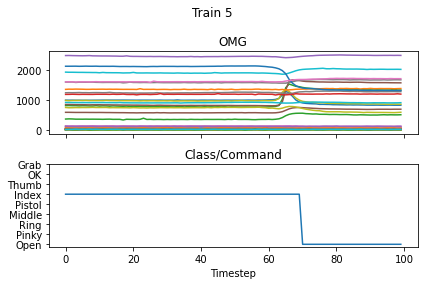

In [87]:
#i = np.random.randint(data_y_train.shape[0])
i = 5
fig, axx = plt.subplots(2, 1, sharex=True)
    
axx[0].plot(data_train[i].T)
axx[0].set_title('OMG')

axx[1].plot(data_y_train[i])
axx[1].set_title('Class/Command')
axx[1].set_xlabel('Timestep')
axx[1].set_yticks(
    np.arange(9),
    ['Open', 'Pinky', 'Ring', 'Middle', 'Pistol', 'Index', 'Thumb', 'OK', 'Grab']
)

plt.suptitle(f'Train {i}')

plt.tight_layout()

In [55]:
data_train.shape

(323, 40, 100)

In [77]:
data_y_train.shape

(323, 100)